In [44]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens
from matplotlib.pyplot import *

In [89]:
p = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='goal_roll50')
qobj = tools_lens.init_qobj(p.stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)
wn = prjlib.wfac('la')
print(wn)

[0.29100472 0.25404107 0.24660663 0.24293087 0.24061643]


In [90]:
q = 'EE'
l, al = np.loadtxt(qobj.f[q].al,unpack=True,usecols=(0,1))
l, n0 = np.loadtxt(qobj.f[q].n0bs,unpack=True,usecols=(0,1))
l, ml = np.loadtxt(qobj.f[q].ml[1],unpack=True,usecols=(0,1))
l, cl, xl, kk = np.loadtxt(qobj.f[q].mcls,unpack=True,usecols=(0,1,3,4))
if 'iso' in p.ntype:
    n0 *= wn[4]
    ml *= wn[4]
    cl *= wn[4]
    xl *= wn[2]
r = kk/xl
print(r)

[           nan 2.16759348e-15 1.06108017e+00 ... 1.04933311e+00
 1.03334804e+00 9.57564013e-01]


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


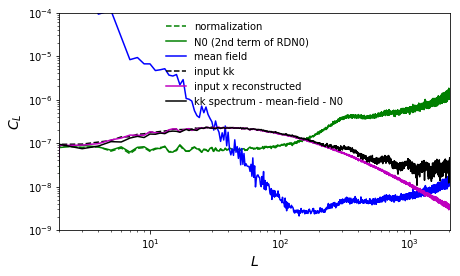

In [91]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-9,ymax=1e-4)
cp = cl - n0 + n0/100.
plot(l,r**2*al,'g--',label='normalization')
plot(l,r**2*n0,'g',label='N0 (2nd term of RDN0)')
plot(l,r**2*ml,'b',label='mean field')
#plot(l,r**2*n0/100.,label='N0/100')
plot(l,kk,'k--',label='input kk')
plot(l,xl,'m',label='input x reconstructed')
plot(l,cp,'k',label='kk spectrum - mean-field - N0')
legend()

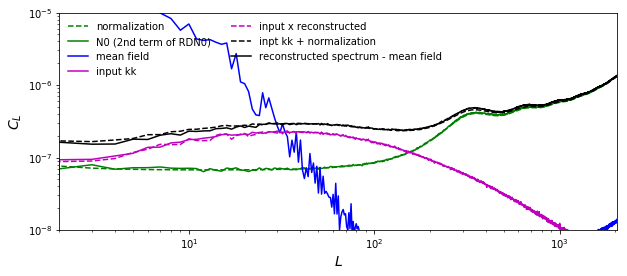

In [92]:
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=1e-5)
plot(l,al,'g--',label='normalization')
plot(l,n0,'g',label='N0 (2nd term of RDN0)')
plot(l,ml,'b',label='mean field')
plot(l,kk,'m',label='input kk')
plot(l,xl,'m--',label='input x reconstructed')
plot(l,kk+al,'k--',label='inpt kk + normalization')
plot(l,cl,label='reconstructed spectrum - mean field',color='k')
legend(ncol=2)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


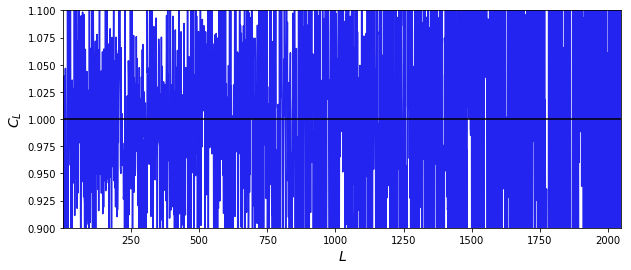

In [85]:
pl.plot_1dstyle(xmin=2,xmax=2048,ymin=0.9,ymax=1.1)
plot(xl/kk)
axhline(1,color='k')
#savefig('fig_xcl_'+q+'.png')